## Exercise 2
In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class


## Start Coding

Let's start with our import of TensorFlow

In [2]:
import tensorflow as tf
print(tf.__version__)

1.14.0


The Handwriting MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [3]:
mnist = tf.keras.datasets.mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the handwriting and their labels.


In [4]:
#splitting dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()


What does these values look like? Let's print a training image, and a training label to see...

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0 

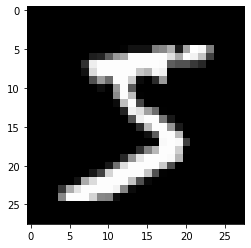

In [7]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = 'gray')
print(y_train[0])
print(x_train[0])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [8]:
x_train = x_train/255.0   #normalising the input
x_test = x_test/255.0

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them. 

In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

In [12]:
from tensorflow.keras import optimizers

class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            if(logs.get('acc')>=0.99):
                print("\n Reached 99% accuracy so cancelling training!")
                self.model.stop_training = True
                
callbacks = myCallback()
model.compile(optimizer = optimizers.Adam(),loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# model fitting
history = model.fit(x_train, y_train, epochs = 10 , callbacks = [callbacks])

Epoch 1/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2018 - acc: 0.9393
Epoch 2/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0801 - acc: 0.9757
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0529 - acc: 0.9832
Epoch 4/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0381 - acc: 0.9876
Epoch 5/10
59872/60000 [============================>.] - ETA: 0s - loss: 0.0266 - acc: 0.9914
 Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0265 - acc: 0.9915


In [13]:
print(history.epoch, history.history['acc'][-1])

[0, 1, 2, 3, 4] 0.99146664


In [15]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.0672 - acc: 0.9803


[0.06724517247370677, 0.9803]

It returned a accuracy of about .9803, which means it was about 98% accurate.